In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage.io import imread
from skimage import feature

In [2]:
#img = imread('{0}.jpg'.format(np.random.randint(1, 6)), True)
img = imread('12.jpg', True)

#img = gaussian_filter(img, 0)

img_edges = feature.canny(img, 3.)

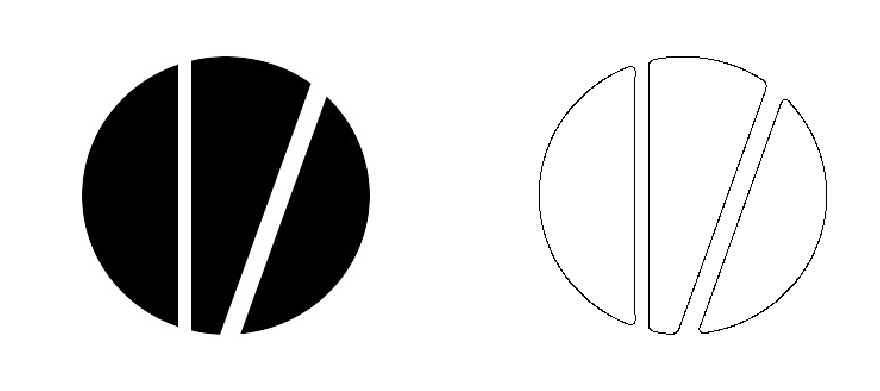

In [3]:
f, a = plt.subplots(1, 2, figsize=(15, 15))

a[0].imshow(img, cmap='gray')
a[0].axis('off')

a[1].imshow(img_edges, cmap='binary')
a[1].axis('off')

plt.show()

In [4]:
def hough_transform(img, amax=180):
    max_length = int(np.sqrt(np.square(img.shape[0]) + np.square(img.shape[1]))) + 1
    v = np.zeros([max_length, amax])
    for x, y in np.ndindex(img.shape):
        if img[x, y] == 0:
            continue
        else:
            t = 0
            for tv in np.linspace(-1.57, 1.57, amax):
                p = int(x*np.cos(tv) + y*np.sin(tv))
                v[p, t] += 1
                t += 1
    return v

#hv = hough_transform(img_edges, 1200)
hv = hough_transform(img_edges)

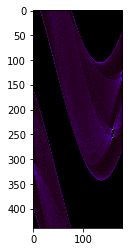

In [12]:
#plt.figure(figsize=(1, 1), dpi=300)
plt.imshow(hv, cmap='gnuplot') #, cmap='gray' , cmap='binary'
#plt.axis('off')
plt.show()

In [8]:
# meaningfull range
def sig_points(hv, gv=.1):
    hv_sorted = np.sort(hv.flat)[::-1]
    p = [hv_sorted[0]-hv_sorted[1]]
    for i in range(2, hv_sorted.size, 2):
        cdn = hv_sorted[i]-hv_sorted[i+1]
        if p[-1]*gv > 1.*(cdn):
            break
        else:
            p.append(cdn)
    return hv_sorted[:i]

sp = sig_points(hv)
print(sp)

[224. 224. 206. 206. 175. 168.  83.  81.  78.  77.]


In [9]:
sp_arg = []
for i in range(sp.size):
    sp_arg.append(np.argwhere(hv == sp[i]))
sp_arg = np.concatenate(sp_arg, 0)
sp_arg

array([[133, 179],
       [307,   0],
       [133, 179],
       [307,   0],
       [121, 179],
       [319,   0],
       [121, 179],
       [319,   0],
       [240, 159],
       [256, 159],
       [238, 160],
       [254, 160],
       [239, 160],
       [255, 160]])

In [10]:
sp_arg[:, 1] = np.linspace(-1.57, 1.57, 1200)[sp_arg[:, 1]]
sp_arg

array([[133,  -1],
       [307,  -1],
       [133,  -1],
       [307,  -1],
       [121,  -1],
       [319,  -1],
       [121,  -1],
       [319,  -1],
       [240,  -1],
       [256,  -1],
       [238,  -1],
       [254,  -1],
       [239,  -1],
       [255,  -1]])